# Lab Week 8: Distributional Semantics

This week there is only one Jupyter notebook for you to complete!  

In the lectures, we have introduced the idea of distributional semantics. In a distributional model of meaning, words are represented in terms of their co-occurrences.

However, what does it mean for two words to co-occur together?  Here we are going to look at how the **definition of co-occurrence** used affects the nature of the similarity discovered.  In particular, we are going to contrast *close proximity* co-occurrence (where words co-occur, say, next to each other) with more *distant proximity* (where words co-occur, say, within a window of 10 words).

First, however, we need a corpus.  Here, we are going to work with the Gutenberg fiction corpus.


In [1]:
###mount google drive

#from google.colab import drive
#drive.mount('/content/drive')


In [2]:
#preliminary imports
import sys
import operator
#make sure you append the path where your utils.py file is.
#sys.path.append('/content/drive/My Drive/NLE Notebooks/Week4LabsSolutions/')
sys.path.append('/home/poppy/Documents/MSc/Autumn_21/ANLP/Week4Labs')
from utils import *



In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/poppy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/poppy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

First, let's grab all of the books available in the gutenberg corpus, as we did in Lab_6_1

In [4]:
from nltk.corpus import gutenberg
book_ids=gutenberg.fileids()
books={b:gutenberg.words(b) for b in book_ids}
len(books)

18

In [5]:
bookstrings={b:gutenberg.raw(b) for b in book_ids}

We can see that there are 18 books.  We don't need to preserve the book boundaries so we can get rid of these. 

In [6]:
gutenberg_corpus=[]
for b in books.values():
    gutenberg_corpus+=list(b)
    
len(gutenberg_corpus)

2621613

In [7]:
gutenberg_corpus[:10]

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER']

We now have a single list containing over 2 million tokens.  We want to segment it into separate sentences (`sent_tokenize` it) and then carry out normalisation for case and number.  *Think about why we want to do these pre-processing steps when building distributional representations of words*.

Annoyingly, we can only apply the sentence tokenizer to strings rather than to lists of tokens.  So we need to join the list of tokens back together into a string, then sentence tokenize and then retokenize the sentences. 

In [8]:
from nltk.tokenize import sent_tokenize, word_tokenize
gutenberg_sentences=sent_tokenize(' '.join(gutenberg_corpus))
tokenized=[word_tokenize(sent) for sent in gutenberg_sentences]
len(tokenized)

98386

In [9]:
print(len(tokenized[0]))
tokenized[0]

60


['[',
 'Emma',
 'by',
 'Jane',
 'Austen',
 '1816',
 ']',
 'VOLUME',
 'I',
 'CHAPTER',
 'I',
 'Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 ',',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessings',
 'of',
 'existence',
 ';',
 'and',
 'had',
 'lived',
 'nearly',
 'twenty',
 '-',
 'one',
 'years',
 'in',
 'the',
 'world',
 'with',
 'very',
 'little',
 'to',
 'distress',
 'or',
 'vex',
 'her',
 '.']

Alternatively, we could have used the gutenberg.raw() function to get the untokenized versions of the texts.  It shouldn't really make any difference.  Note, however, that a different tokenizer was obviously used to create the words representation of a document as twenty-one is split into 3 tokens above but left as one below.

In [10]:
#bookstrings={b:gutenberg.raw(b) for b in book_ids}
#gutenberg_corpus=''
#for b in bookstrings.values():
    #gutenberg_corpus+=b
#gutenberg_sentences=sent_tokenize(gutenberg_corpus)
#tokenized=[word_tokenize(sent) for sent in gutenberg_sentences]
#len(tokenized)

In [11]:
#print(len(tokenized[0]))
#tokenized[0]

Now to apply normalization.  You could use a normalize function imported from utils or define your own here.  This one carries out lower-casing and removes punctuation and numbers.  Stopwords are left in because they could be important in characterising the context of a word.

In [12]:
#case normalise, Nth, NUM, punct
def normalise(wordlist):
    lowered=[word.lower() for word in wordlist]
    normalised=["Nth" if (token.endswith(("nd","st","th")) and token[:-2].isdigit()) else token for token in lowered]
    normalised=["NUM" if token.isdigit() else token for token in normalised]
    filtered=[word for word in normalised if word.isalpha()]
    return filtered

normalised=[normalise(sent) for sent in tokenized]

normalised[0]

['emma',
 'by',
 'jane',
 'austen',
 'NUM',
 'volume',
 'i',
 'chapter',
 'i',
 'emma',
 'woodhouse',
 'handsome',
 'clever',
 'and',
 'rich',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessings',
 'of',
 'existence',
 'and',
 'had',
 'lived',
 'nearly',
 'twenty',
 'one',
 'years',
 'in',
 'the',
 'world',
 'with',
 'very',
 'little',
 'to',
 'distress',
 'or',
 'vex',
 'her']

### Exercise 1
* Find the frequency distribution of words in the sample of sentences (i.e., how often does each word appear in the corpus).
* Generate a list of the 100 most frequent words in the corpus. 

In [13]:
"""
from nltk.probability import FreqDist

freq_dist = FreqDist()

for sent in normalised:
    freq_dist+=FreqDist(sent)
print("done")

top_100 = freq_dist.most_common(100)
"""

#this method is much slower so use dictionaries rather than FreqDist

'\nfrom nltk.probability import FreqDist\n\nfreq_dist = FreqDist()\n\nfor sent in normalised:\n    freq_dist+=FreqDist(sent)\nprint("done")\n\ntop_100 = freq_dist.most_common(100)\n'

In [14]:
def freq_dist(sentences):
    mydict={}
    for sentence in sentences:
        for token in sentence:
            mydict[token]=mydict.get(token,0)+1
    return mydict

def most_frequent(freqdist,k=100):
    return sorted(freqdist.items(),key=operator.itemgetter(1),reverse=True)[:k]

most_frequent(freq_dist(normalised))

[('the', 133583),
 ('and', 95442),
 ('of', 71267),
 ('NUM', 63133),
 ('to', 48057),
 ('a', 33960),
 ('in', 33580),
 ('i', 30265),
 ('that', 28798),
 ('he', 25857),
 ('it', 22303),
 ('his', 21402),
 ('for', 19527),
 ('was', 18715),
 ('not', 18189),
 ('with', 17599),
 ('is', 16435),
 ('you', 16398),
 ('be', 16115),
 ('as', 14528),
 ('but', 13944),
 ('all', 13725),
 ('they', 13104),
 ('him', 13012),
 ('shall', 11682),
 ('her', 11552),
 ('my', 10511),
 ('had', 10317),
 ('them', 10245),
 ('have', 10116),
 ('s', 9896),
 ('me', 9469),
 ('said', 9429),
 ('at', 9174),
 ('she', 9078),
 ('from', 9076),
 ('unto', 9010),
 ('this', 8915),
 ('which', 8775),
 ('on', 8596),
 ('lord', 8590),
 ('by', 8512),
 ('their', 7806),
 ('so', 7791),
 ('will', 7368),
 ('were', 6871),
 ('are', 6854),
 ('thou', 6759),
 ('there', 6380),
 ('when', 6330),
 ('or', 6325),
 ('one', 6218),
 ('no', 5846),
 ('what', 5792),
 ('out', 5771),
 ('man', 5615),
 ('thy', 5609),
 ('god', 5287),
 ('if', 5245),
 ('we', 5134),
 ('your', 

### Generating feature representations

We want to be able to consider any words that are in a certain **window** around a target word as features of that word.  The code below demonstrates how to iterate through a sentence and find all of the tokens within a given window of each word.

In [15]:
tokens=word_tokenize("the moon is blue and made of cheese")

window=1

for i,word in enumerate(tokens):
    print(word,tokens[max(0,i-window):i]+tokens[i+1:i+window+1])

the ['moon']
moon ['the', 'is']
is ['moon', 'blue']
blue ['is', 'and']
and ['blue', 'made']
made ['and', 'of']
of ['made', 'cheese']
cheese ['of']


In [16]:
tokens=word_tokenize("there is always a fat cat sitting on the mat")
window=3
reps={}
for i,word in enumerate(tokens):
    reps[i]=(word,tokens[max(0,i-window):i]+tokens[i+1:i+window+1])
print(reps)

{0: ('there', ['is', 'always', 'a']), 1: ('is', ['there', 'always', 'a', 'fat']), 2: ('always', ['there', 'is', 'a', 'fat', 'cat']), 3: ('a', ['there', 'is', 'always', 'fat', 'cat', 'sitting']), 4: ('fat', ['is', 'always', 'a', 'cat', 'sitting', 'on']), 5: ('cat', ['always', 'a', 'fat', 'sitting', 'on', 'the']), 6: ('sitting', ['a', 'fat', 'cat', 'on', 'the', 'mat']), 7: ('on', ['fat', 'cat', 'sitting', 'the', 'mat']), 8: ('the', ['cat', 'sitting', 'on', 'mat']), 9: ('mat', ['sitting', 'on', 'the'])}


### Exercise 2.1
Write a function `generate_features(sentences,window=1)` which takes
* a list of sentences (where each sentence is a list of tokens); and
* and a window size; 

This function should output
* a dictionary of dictionaries

The key to the outermost dictionary is a word.  The key to each internal dictionary is a another word (a co-occurrence feature).  The value in the internal dictionary should be the number of the times the words co-occur together (within the given window).  

For example, with the sentences in `sents`, your function should generate the following output:

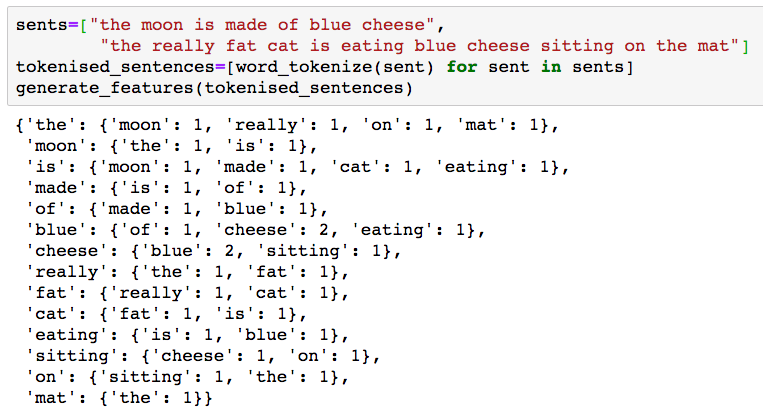


In [17]:
#from lab solutions...

In [18]:
def generate_features(sentences,window=1):
    mydict={}
    for sentence in sentences:
        for i,token in enumerate(sentence):
            current=mydict.get(token,{})
            features=sentence[max(0,i-window):i]+sentence[i+1:i+window+1]
            for feature in features:
                current[feature]=current.get(feature,0)+1
            mydict[token]=current
    return mydict

In [19]:
##this won't work until you define the function generate_features()
sents=["the moon is made of blue cheese",
        "the really fat cat is eating blue cheese sitting on the mat"]
tokenised_sentences=[word_tokenize(sent) for sent in sents]
generated_features = generate_features(tokenised_sentences,window=1)

generated_features

{'the': {'moon': 1, 'really': 1, 'on': 1, 'mat': 1},
 'moon': {'the': 1, 'is': 1},
 'is': {'moon': 1, 'made': 1, 'cat': 1, 'eating': 1},
 'made': {'is': 1, 'of': 1},
 'of': {'made': 1, 'blue': 1},
 'blue': {'of': 1, 'cheese': 2, 'eating': 1},
 'cheese': {'blue': 2, 'sitting': 1},
 'really': {'the': 1, 'fat': 1},
 'fat': {'really': 1, 'cat': 1},
 'cat': {'fat': 1, 'is': 1},
 'eating': {'is': 1, 'blue': 1},
 'sitting': {'cheese': 1, 'on': 1},
 'on': {'sitting': 1, 'the': 1},
 'mat': {'the': 1}}

## Pointwise Mutual Information (PMI)
So far, we have calculated the frequency of two events occurring together.  For example, we can see how often the word 'summer' appears in the window around the word 'house'

In [20]:
reps=generate_features(normalised,window=1)

In [21]:
reps['house']['summer']

9

In [22]:
print(reps.keys())

dict_keys(['emma', 'by', 'jane', 'austen', 'NUM', 'volume', 'i', 'chapter', 'woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a', 'comfortable', 'home', 'happy', 'disposition', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'existence', 'had', 'lived', 'nearly', 'twenty', 'one', 'years', 'in', 'world', 'very', 'little', 'distress', 'or', 'vex', 'her', 'she', 'was', 'youngest', 'two', 'daughters', 'most', 'affectionate', 'indulgent', 'father', 'consequence', 'sister', 's', 'marriage', 'been', 'mistress', 'his', 'house', 'from', 'early', 'period', 'mother', 'died', 'too', 'long', 'ago', 'for', 'have', 'more', 'than', 'an', 'indistinct', 'remembrance', 'caresses', 'place', 'supplied', 'excellent', 'woman', 'as', 'governess', 'who', 'fallen', 'short', 'affection', 'sixteen', 'miss', 'taylor', 'mr', 'family', 'less', 'friend', 'fond', 'both', 'but', 'particularly', 'between', 'it', 'intimacy', 'sisters', 'even', 'before', 'ceased', 'hold', 'nominal', 'office', '

We use positive pointwise mutual information (PPMI) to establish how **significant** a given frequency of co-occurrence is.  If player and tennis are both very common words then their co-occurring together 10 times may be insignificant.  However, if they are rare words, then a co-occurrence of 10 should be considered as more important in the representation of each word.  PMI can be calculated as follows:

\begin{eqnarray*}
PMI(word,feat) = \frac{\mbox{freq}(word,feat) \times \Sigma_{w*,f*} \mbox{freq}(w*,f*)}{\Sigma_{f*} \mbox{freq}(word,f*) \times \Sigma_{w*} \mbox{freq}(w*,feat)}
\end{eqnarray*}


In order to carry out this calculation, we can see that we need the frequency of the co-occurrence *player* and *tennis*, the total number of times *player* has occurred with any feature, the total number of times *tennis* has occurred as a feature and the grand total of all possible co-occurrences.  We can keep track of these totals as we build the feature representations.


## Exercise 3.1
Create a class `WordVectors`.  This should be initialised with a list of sentences and a desired window size.  On initialisation, the feature representations of all words, together with word totals and feature totals should be generated and stored in the object as
* self.reps (the feature representations: a dictionary of dictionaries}
* self.wordtotals (the frequency of each word: a dictionary of integers (with the same keys as self.reps)
* self.feattotals (the frequency of each feature: a dictionary of integers (with the same keys as the dictionaries indexed by self.reps)

Generate vectors from the sample sentences with a window_size of 3.  If you look at the representation of `house`, you should find that the feature `summer` has the value 10.  The total frequency of features for the word `house` is 16268, and the total frequency of occurrences of the feature `summer` is 950.

In [23]:
class WordVectors_from_solutions:
    def __init__(self,sentences,window=3):
        self.sentences=sentences
        self.window=window
        
        self.reps={}
        self.wordtotals={}
        self.feattotals={}
        
        self.generate_features()
        self.grandtotal=sum(self.wordtotals.values())
    
    def generate_features(self):
        for sentence in self.sentences:
            for i,token in enumerate(sentence):
                current=self.reps.get(token,{})
                features=sentence[max(0,i-self.window):i]+sentence[i+1:i+self.window+1]
                for feature in features:
                    current[feature]=current.get(feature,0)+1
                    self.feattotals[feature]=self.feattotals.get(feature,0)+1
                self.wordtotals[token]=self.wordtotals.get(token,0)+len(features)
                self.reps[token]=current

    def convert_to_ppmi(self):
        self.ppmi={word:{feat:max(0,math.log((freq*self.grandtotal)/(self.wordtotals[word]*self.feattotals[feat]),2)) for (feat,freq) in rep.items()} for (word,rep) in self.reps.items()}
        
        

In [24]:
"""
class WordVectors:
    def __init__(self, sentenceList, window_size):
        self.sentenceList = sentenceList
        self.window_size = window_size
        
        self.reps = self.getFeatureReps(self.sentenceList, self.window_size)
        self.wordtotals = self.getWordTotals(self.reps)
        self.feattotals = self.getFeatTotals(self.reps)
                
    def getFeatureReps(self,sentences,window):
        mydict={}
        for sentence in sentences:
            for i,token in enumerate(sentence):
                current = mydict.get(token,{})
                features=sentence[max(0,i-window):i]+sentence[i+1:i+window+1]
                for feature in features:
                    current[feature]=current.get(feature,0)+1
                mydict[token]=current
        return mydict
    
    def getWordTotals(self, reps):
        word_totals = {}
        for rep, freq in reps.items():
            word_totals[rep] = word_totals.get(rep,0)+1
        return word_totals
            
    def getFeatTotals(self, reps):
        feat_totals = {}
        for inner_dict in reps.values():
            for feature in inner_dict.keys():
                feat_totals[feature] = feat_totals.get(feature,0)+1
        return feat_totals
    
    def convert_to_ppmi(self):
        self.ppmi={word:{feat:max(0,math.log((freq*self.grandtotal)/(self.wordtotals[word]*self.feattotals[feat]),2)) for (feat,freq) in rep.items()} for (word,rep) in self.reps.items()}
"""        

'\nclass WordVectors:\n    def __init__(self, sentenceList, window_size):\n        self.sentenceList = sentenceList\n        self.window_size = window_size\n        \n        self.reps = self.getFeatureReps(self.sentenceList, self.window_size)\n        self.wordtotals = self.getWordTotals(self.reps)\n        self.feattotals = self.getFeatTotals(self.reps)\n                \n    def getFeatureReps(self,sentences,window):\n        mydict={}\n        for sentence in sentences:\n            for i,token in enumerate(sentence):\n                current = mydict.get(token,{})\n                features=sentence[max(0,i-window):i]+sentence[i+1:i+window+1]\n                for feature in features:\n                    current[feature]=current.get(feature,0)+1\n                mydict[token]=current\n        return mydict\n    \n    def getWordTotals(self, reps):\n        word_totals = {}\n        for rep, freq in reps.items():\n            word_totals[rep] = word_totals.get(rep,0)+1\n        retu

In [25]:
vectors_3=WordVectors_from_solutions(normalised)
print(vectors_3.reps['house']['summer'])
print(vectors_3.wordtotals['house'])
print(vectors_3.feattotals['summer'])

10
16268
950


In [26]:
vectors_3.convert_to_ppmi()
print(vectors_3.ppmi['house']['summer'])

2.9626004336566303


In [ ]:
vectors_4=WordVectors_from_solutions(normalised,4)
print(vectors_4.reps['house']['summer'])
print(vectors_4.wordtotals['house'])
print(vectors_4.feattotals['summer'])

In [ ]:
vectors_4.convert_to_ppmi()
print(vectors_3.ppmi['house']['summer'])

## Positive PMI (PPMI)
We now want to convert the representation of each word from a representation based on frequency to one based on PMI.  In fact, we want to ignore any features so we use **positive PMI**

\begin{eqnarray*}
\mbox{PPMI}(word,feat)=
\begin{cases}PMI(word,feat),& \mbox{if PMI}(word,feat)>0\\
=0,& \mbox{otherwise}
\end{cases}
\end{eqnarray*}

### Exercise 3.2
Now add a method to your `WordVectors` class which will calculate the PPMI value for each feature in each vector.

The PPMI between `house` and `summer` should be 2.96

In [ ]:
# have already added in the above code

## Word Similarity
We are going to use cosine similarity to compute the similarity between two word vectors.  

First lets define a function to compute the dot product of two vectors. This could be imported or copied from the lab on Document Similarity.  However, an implementation is given to you below which you can use.

In [ ]:
def dot(vecA,vecB):
    the_sum=0
    for (key,value) in vecA.items():
        the_sum+=value*vecB.get(key,0)
    return the_sum


### Exercise 4.3

* Add a `similarity()` method to your `WordVectors` class to enable you to calculate the similarity between two word representations.
* You should find similarity between `summer` and `winter` is 0.09. 

In [ ]:
class WordVectors_from_solutions:
    def __init__(self,sentences,window=3):
        self.sentences=sentences
        self.window=window
        
        self.reps={}
        self.wordtotals={}
        self.feattotals={}
        
        self.generate_features()
        self.grandtotal=sum(self.wordtotals.values())
    
    def generate_features(self):
        for sentence in self.sentences:
            for i,token in enumerate(sentence):
                current=self.reps.get(token,{})
                features=sentence[max(0,i-self.window):i]+sentence[i+1:i+self.window+1]
                for feature in features:
                    current[feature]=current.get(feature,0)+1
                    self.feattotals[feature]=self.feattotals.get(feature,0)+1
                self.wordtotals[token]=self.wordtotals.get(token,0)+len(features)
                self.reps[token]=current

    def convert_to_ppmi(self):
        self.ppmi={word:{feat:max(0,math.log((freq*self.grandtotal)/(self.wordtotals[word]*self.feattotals[feat]),2)) for (feat,freq) in rep.items()} for (word,rep) in self.reps.items()}
        
    def dot_product(self,vecA,vecB):
        the_sum=0
        for (key,value) in vecA.items():
            the_sum+=value*vecB.get(key,0)
        return the_sum
        
    def similarity(self,word1,word2):
        rep1=self.ppmi.get(word1,{})
        rep2=self.ppmi.get(word2,{})
        cosine_sim = self.dot_product(rep1,rep2)/math.sqrt(self.dot_product(rep1,rep1)*self.dot_product(rep2,rep2))
        return cosine_sim
        

In [ ]:
wv = WordVectors_from_solutions(normalised)
wv.convert_to_ppmi()
print(wv.similarity('summer','winter'))

## Nearest Neighbours
We now want to be able to find the nearest neighbours of a given word.  In order to do this we need to find its similarity with every other word in a set of *candidates* and then rank them by similarity.

### Exercise 5.2
* Add functionality to your `WordVectors` class to be enable you to find the *k* nearest neighbours of any words.   You can improve efficiency by only considering the 1000 most frequent words as *candidates*
* Use your functionality to explore the effect of increasing the window size on the neighbourhood of a word.  You should consider at least:
    * 3 different words e.g., \['summer', 'winter','house'\]
    * 2 different neighbourhood sizes:e.g., window = \[1, 10\]
* Comment on the differences.

In [ ]:
class WordVectors_from_solutions:
    def __init__(self,sentences,window=3):
        self.sentences=sentences
        self.window=window
        
        self.reps={}
        self.wordtotals={}
        self.feattotals={}
        
        self.generate_features()
        self.grandtotal=sum(self.wordtotals.values())
    
    def generate_features(self):
        for sentence in self.sentences:
            for i,token in enumerate(sentence):
                current=self.reps.get(token,{})
                features=sentence[max(0,i-self.window):i]+sentence[i+1:i+self.window+1]
                for feature in features:
                    current[feature]=current.get(feature,0)+1
                    self.feattotals[feature]=self.feattotals.get(feature,0)+1
                self.wordtotals[token]=self.wordtotals.get(token,0)+len(features)
                self.reps[token]=current

    def convert_to_ppmi(self):
        self.ppmi={word:{feat:max(0,math.log((freq*self.grandtotal)/(self.wordtotals[word]*self.feattotals[feat]),2)) for (feat,freq) in rep.items()} for (word,rep) in self.reps.items()}
        
    def dot_product(self,vecA,vecB):
        the_sum=0
        for (key,value) in vecA.items():
            the_sum+=value*vecB.get(key,0)
        return the_sum
        
    def similarity(self,word1,word2):
        rep1=self.ppmi.get(word1,{})
        rep2=self.ppmi.get(word2,{})
        cosine_sim = self.dot_product(rep1,rep2)/math.sqrt(self.dot_product(rep1,rep1)*self.dot_product(rep2,rep2))
        return cosine_sim
    
    def nearest_neighbours(self,word1,n=1000,k=10):
        candidates=sorted(self.wordtotals.items(),key=operator.itemgetter(1),reverse=True)[:n]
        sims=[(cand,self.similarity(word1,cand)) for (cand,_) in candidates]
        return sorted(sims,key=operator.itemgetter(1),reverse=True)[:k]
    

In [ ]:
vectors_1=WordVectors_from_solutions(normalised,window=1)
vectors_1.convert_to_ppmi()

In [ ]:
vectors_1.nearest_neighbours('summer')

In [ ]:
vectors_1.nearest_neighbours('winter')

In [ ]:
vectors_1.nearest_neighbours('house')

In [ ]:
vectors_10=WordVectors_from_solutions(normalised,window=1)
vectors_10.convert_to_ppmi()

In [ ]:
vectors_10.nearest_neighbours('summer')

In [ ]:
vectors_10.nearest_neighbours('winter')

In [ ]:
vectors_10.nearest_neighbours('house')

Code below is example possibilities I use in the lecture (choose which of these correctly calculates PPMI for the representations)

In [ ]:
import math

reps={'tennis':{'player':1}}
wordtotals={'tennis':250}
feattotals={'player':500}
grandtotal=100000

ppmi={word:{feat:max(0,math.log((value*grandtotal)/(wordtotals[word]*feattotals[feat]),2)) 
            for feat,value in rep.items()} for word,rep in reps.items()}

ppmi